_*Program for Deep learning LAB (college assignment)*_
# KTU B. tech in AI & ML 
# Deep Learning LAB AIL 411
### Removing outliers using two method: Z-score and IQR methods

In [1]:
import pandas as pd

df = pd.read_csv("/kaggle/input/experience-salary-dataset/Experience-Salary.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   exp(in months)        1000 non-null   float64
 1   salary(in thousands)  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [2]:
df.head()

exp(in months)  salary(in thousands)
0       18.290293             16.521825
1       17.023407             11.666234
2       26.343613             23.167255
3       19.105834             20.877145
4       27.742516             23.166236

[]

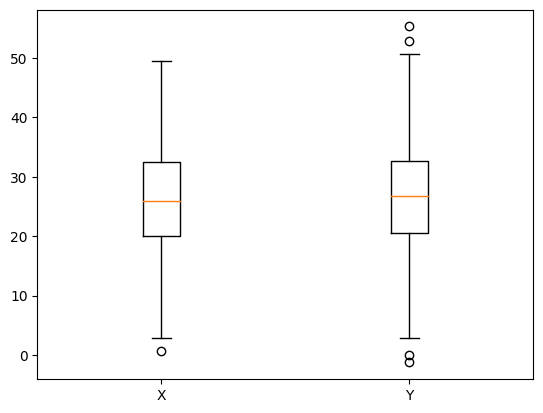

In [3]:
import matplotlib.pyplot as plt

plt.boxplot(df, labels=["X", "Y"])
plt.plot()

# 1. Using Z-score Method

In [4]:
import numpy as np

def get_outliers_z_score(data, threshold=2.8):
    '''
    Returns a set of index with data having z-score value which are above 
    the threshold value
    '''
    mean = np.mean(data)
    std = np.std(data)
    size = len(data)
    
    outliers = list()
    
    for i in range(size):
        z_score = (data[i] - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
            
    return set(outliers)

In [5]:
outliers = list(get_outliers_z_score(list(df.iloc[:,0])).union(get_outliers_z_score(list(df.iloc[:,1]))))
print(outliers)

[772, 133, 86, 504, 47]


In [6]:
new_df = df.drop(index=outliers)

[]

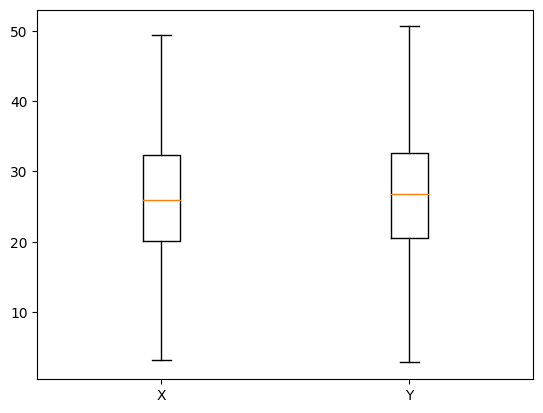

In [7]:
plt.boxplot(new_df, labels=["X", "Y"])
plt.plot()

# 2. Using IQR method

In [8]:
def get_outliers_IQR(data):
    '''
    Returns a set of index of the outliers
    '''
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3-q1
    
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    
    outliers = [i for i,j in enumerate(data) if j < lower or j > upper]
    
    return set(outliers)

In [9]:
iqr_outliers = list(get_outliers_IQR(list(df.iloc[:,0])).union(get_outliers_IQR(list(df.iloc[:,1]))))
print(iqr_outliers)

[772, 133, 86, 504, 47]


In [10]:
iqr_new_df = df.drop(index=iqr_outliers)

[]

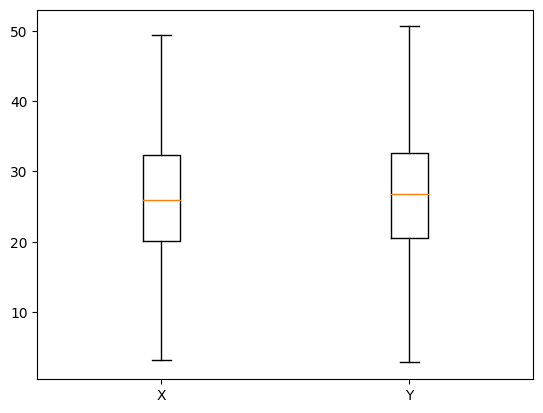

In [11]:
plt.boxplot(iqr_new_df, labels=["X", "Y"])
plt.plot()